## Лабораторна робота 3

### Завдання 1.1:
#### Розробити звичайний автокодувальник  для датасету рукописних цифр MNIST на основі багатошарової нейронної мережі. 

In [1]:
#Імпортуємо всі необхідні бібліотеки
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as kr
import keras.backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Lambda, BatchNormalization, Dropout, Conv2D, MaxPooling2D, UpSampling2D

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_2 (Dense)             (None, 

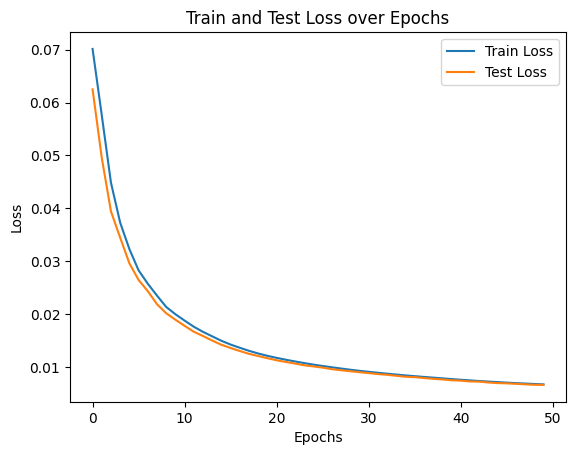

1/1 [==============================] - 0s 78ms/step


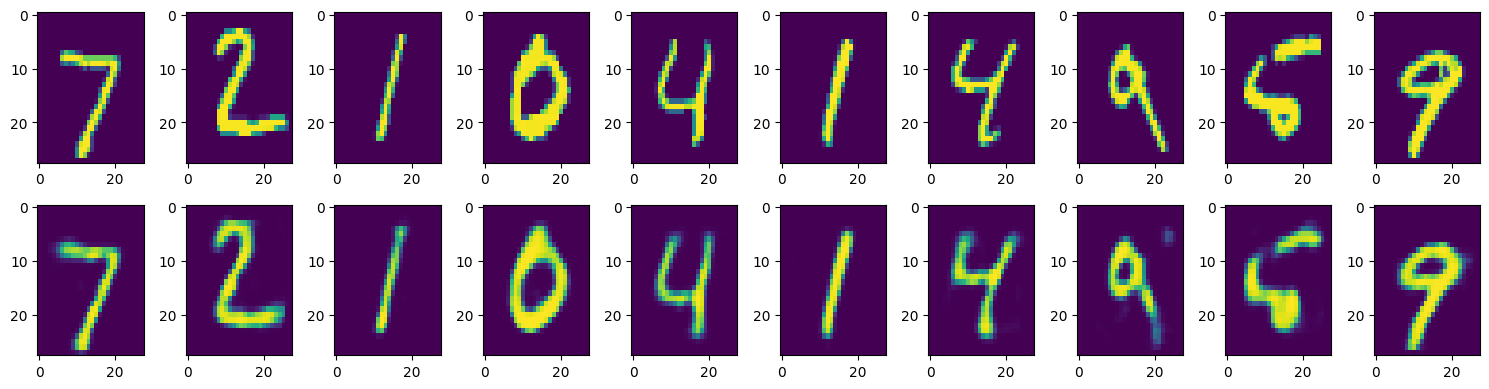

In [2]:
# MNIST параметри.
num_features = 784 # кількість клітинок датасету (28*28).

# Тренувальні параметри
batch_size = 128
epochs = 50

# Мережеві параметри
hidden_1 = 128 # 1-ий шар.
hidden_2 = 64 # 2-ий шар.

# Функції для моделі
# Завантаження даних
def load_data(choice='mnist', labels=False):

    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    X_train, X_test = X_train / 255., X_test / 255.
    X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])
    X_train = X_train.astype(np.float32, copy=False)
    X_test = X_test.astype(np.float32, copy=False)
    
    if labels:
        return (X_train, y_train), (X_test, y_test)
    
    return X_train, X_test

# Візуалізація передбачення
def plot_predictions(y_true, y_pred):    
    f, ax = plt.subplots(2, 10, figsize=(15, 4))
    for i in range(10):
        ax[0][i].imshow(np.reshape(y_true[i], (28, 28)), aspect='auto')
        ax[1][i].imshow(np.reshape(y_pred[i], (28, 28)), aspect='auto')
    plt.tight_layout()

def plot_digits(X, y, encoder, batch_size=128):

    z_mean, _, _ = encoder.predict(X, batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y)
    plt.colorbar()
    plt.xlabel("z[0] Latent Dimension")
    plt.ylabel("z[1] Latent Dimension")
    plt.show()
    
    
def generate_manifold(decoder):
    
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]
    
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit        
    
    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0] Latent Dimension")
    plt.ylabel("z[1] Latent Dimension")
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

# Графік функції втрат на тренувальних і тестових даних
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train and Test Loss over Epochs')
    plt.legend()
    plt.show()

# Енкодер
inputs = Input(shape=(num_features, ))
encoder = Dense(hidden_1, activation='sigmoid')(inputs)
encoder = Dense(hidden_2, activation='sigmoid')(encoder)
encoder_model = kr.Model(inputs, encoder, name='encoder')
encoder_model.summary()

# Декодер
latent_dim = Input(shape=(hidden_2, ))
decoder = Dense(hidden_1, activation='sigmoid')(latent_dim)
decoder = Dense(num_features, activation='sigmoid')(decoder)
decoder_model = kr.Model(latent_dim, decoder, name='decoder')
decoder_model.summary()

# Автокодер
outputs = decoder_model(encoder_model(inputs))
mnist_model = kr.Model(inputs, outputs )
mnist_model.compile(optimizer='adam', loss='mse')
mnist_model.summary()

# Тренування моделі
X_train, X_test = load_data('mnist')
history = mnist_model.fit(x=X_train, y=X_train, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(X_test, X_test))

#Відображення графіку втрат
plot_loss(history)

# Відображення результатів
y_true = X_test[:10]
y_pred = mnist_model.predict(y_true)
plot_predictions(y_true, y_pred)

### Завдання 1.2:
#### Розробити звичайний автокодувальник для датасету MNIST на основі згорткової моделі.

Epoch 1/50
469/469 [==============================] - 42s 87ms/step - loss: 0.2152 - val_loss: 0.1433
Epoch 2/50
469/469 [==============================] - 39s 82ms/step - loss: 0.1340 - val_loss: 0.1251
Epoch 3/50
469/469 [==============================] - 40s 86ms/step - loss: 0.1224 - val_loss: 0.1189
Epoch 4/50
469/469 [==============================] - 43s 91ms/step - loss: 0.1170 - val_loss: 0.1136
Epoch 5/50
469/469 [==============================] - 45s 96ms/step - loss: 0.1136 - val_loss: 0.1114
Epoch 6/50
469/469 [==============================] - 45s 95ms/step - loss: 0.1111 - val_loss: 0.1085
Epoch 7/50
469/469 [==============================] - 44s 93ms/step - loss: 0.1092 - val_loss: 0.1071
Epoch 8/50
469/469 [==============================] - 43s 93ms/step - loss: 0.1076 - val_loss: 0.1059
Epoch 9/50
469/469 [==============================] - 43s 92ms/step - loss: 0.1062 - val_loss: 0.1043
Epoch 10/50
469/469 [==============================] - 43s 92ms/step - loss: 0.105

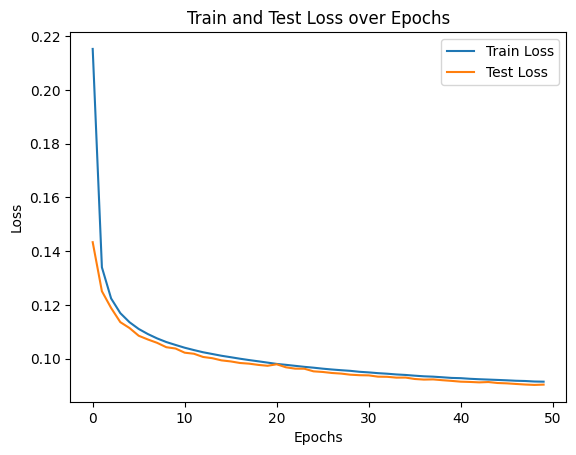

1/1 [==============================] - 0s 141ms/step


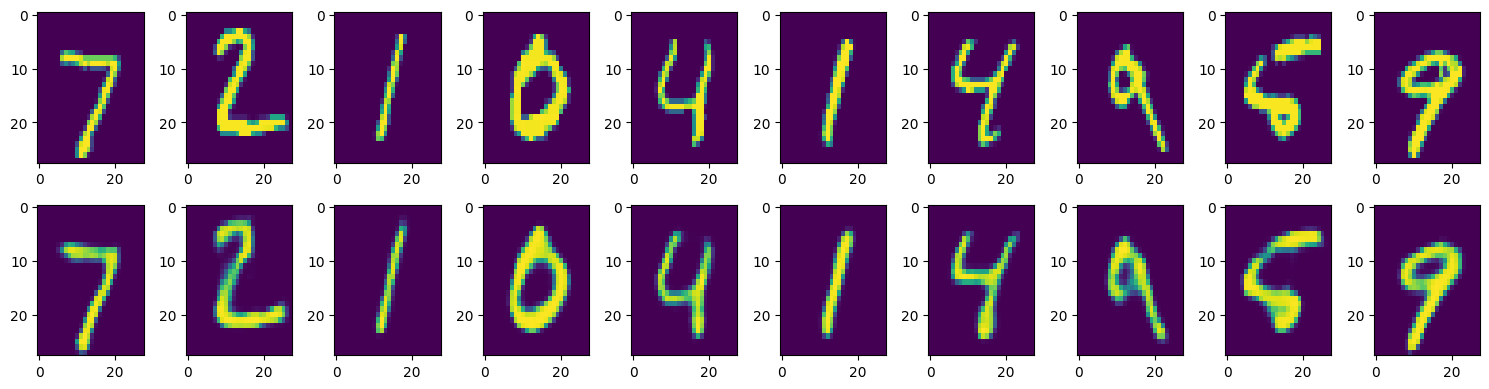

In [3]:
# Завантаження та нормалізація даних датасету
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

inputs = Input(shape=(28, 28, 1))

# Енкодео
encoder = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)
encoder = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)
encoder = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)

# Декодер
decoder = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)
decoder = UpSampling2D((2, 2))(decoder)
decoder = Conv2D(8, (3, 3), activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2, 2))(decoder)
decoder = Conv2D(16, (3, 3), activation='relu')(decoder)
decoder = UpSampling2D((2, 2))(decoder)
decoder = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoder)

# Автокодер
autoencoder = kr.Model(inputs, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Тренування моделі
history = autoencoder.fit(x=x_train, y=x_train, batch_size=batch_size, shuffle=True, epochs=epochs, validation_data=(x_test, x_test))

#Відображення графіку втрат
plot_loss(history)

# Відображення результатів
y_true = x_test[:10]
y_pred = autoencoder.predict(y_true)
plot_predictions(y_true, y_pred)

#### Висновок:
Отже, у завданні 1 я навчилася створювати автокодувальник за допомогою багатошарової нейронної мережі та згорткової моделі, представляти отримані прогнози на графіку.

### Завдання 2:
#### Розробитии варіаційний автокодувальник для датасету рукописних цифр MNIST на основі багатошарової моделі. Побудувати функцію втрат. Візуалізацію розпізнавання. Порівняти результати із звичайним автокодувальником.

Epoch 1/30
1000/1000 [==============================] - 9s 7ms/step - loss: 71.0031 - val_loss: 47.3002
Epoch 2/30
1000/1000 [==============================] - 7s 7ms/step - loss: 44.6546 - val_loss: 39.4664
Epoch 3/30
1000/1000 [==============================] - 7s 7ms/step - loss: 40.9441 - val_loss: 37.4304
Epoch 4/30
1000/1000 [==============================] - 8s 8ms/step - loss: 39.5350 - val_loss: 36.2617
Epoch 5/30
1000/1000 [==============================] - 7s 7ms/step - loss: 38.6960 - val_loss: 35.2970
Epoch 6/30
1000/1000 [==============================] - 7s 7ms/step - loss: 37.9799 - val_loss: 34.5744
Epoch 7/30
1000/1000 [==============================] - 7s 7ms/step - loss: 37.4434 - val_loss: 33.9889
Epoch 8/30
1000/1000 [==============================] - 7s 7ms/step - loss: 37.0881 - val_loss: 33.5391
Epoch 9/30
1000/1000 [==============================] - 7s 7ms/step - loss: 36.7079 - val_loss: 33.2536
Epoch 10/30
1000/1000 [==============================] - 7s 7ms/

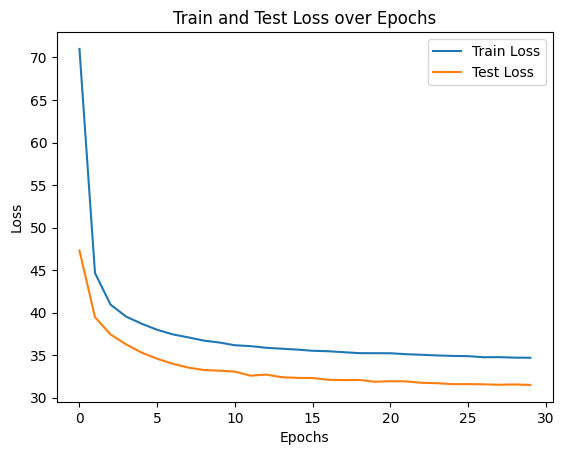

100/100 [==============================] - 0s 2ms/step


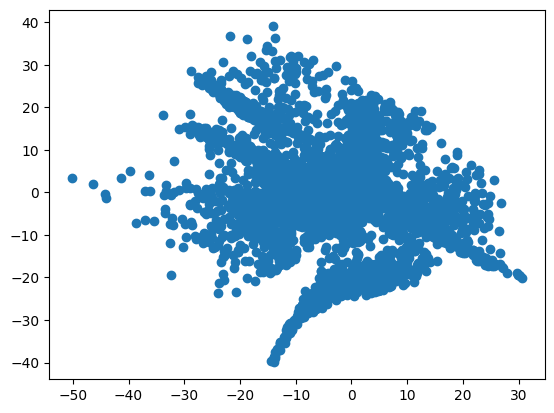

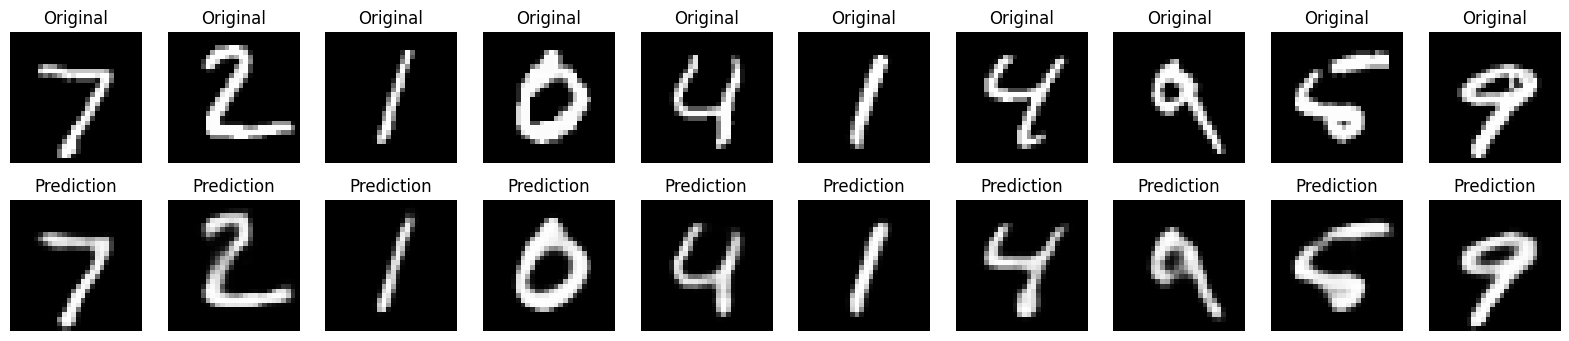

In [16]:
# Завантаження та попередня обробка даних
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

# Параметри моделі
hidden_dim = 2
batch_size = 60

# Функції для моделі
def dropout_and_batch(x):
    return Dropout(0.3)(BatchNormalization()(x))

# Побудова моделі
img = Input((28, 28, 1))
x = Flatten()(img)
x = Dense(256, activation='relu')(x)
x = dropout_and_batch(x)
x = Dense(128, activation='relu')(x)
x = dropout_and_batch(x)

z_mean = Dense(hidden_dim)(x)
z_log_var = Dense(hidden_dim)(x)

def noiser(args):
    global z_mean, z_log_var
    z_mean, z_log_var = args
    N = K.random_normal(shape=(K.shape(z_mean)[0], hidden_dim), mean=0., stddev=1.0)
    return K.exp(z_log_var / 2) * N + z_mean

h = Lambda(noiser, output_shape=(hidden_dim,))([z_mean, z_log_var])
input_dec = Input(shape=(hidden_dim,))
d = Dense(128, activation='relu')(input_dec)
d = dropout_and_batch(d)
d = Dense(256, activation='relu')(d)
d = dropout_and_batch(d)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

encoder = kr.Model(img, h, name='encoder')
decoder = kr.Model(input_dec, decoded, name='decoder')
vae = kr.Model(img, decoder(encoder(img)), name="vae")

# Зменшуємо вплив KL-дивергенції
kl_weight = 0.0001

def vae_loss(x, y):
    x = K.reshape(x, shape=(-1, 28*28))
    y = K.reshape(y, shape=(-1, 28*28))
    loss = K.sum(K.square(x-y), axis=-1)
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return loss + kl_weight * kl_loss

vae.compile(optimizer='adam', loss=vae_loss)

# Навчання моделі та отримання історії навчання
history = vae.fit(x_train, x_train, epochs=30, batch_size=batch_size, shuffle=True, validation_data=(x_test, x_test))

# Графік функції втрат на тренувальних і тестових даних
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Epochs')
plt.legend()
plt.show()

# Графік розсіювання для перших 6000 результатів
h = encoder.predict(x_test[:6000], batch_size=batch_size)
plt.scatter(h[:, 0], h[:, 1])

# Відображення результатів
plt.figure(figsize=(20, 4))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(y_true[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_pred[i].reshape(28, 28), cmap='gray')
    plt.title('Prediction')
    plt.axis('off')

plt.show()

#### Висновок:
Отже, у моєму випадку навчання варіаційного кодувальника було менш точним, нім простого автокодувальника, але результати були задовільними.